In [11]:
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [12]:
# 数据路径
PROCESSED_DATA_PATH = "G:/DataSets/Ali_Display_Ad_Click/processed_data"
# %%
ad_user_sample_data_fea = pd.read_pickle(f'{PROCESSED_DATA_PATH}/ad_user_sample_data_fea.pkl')

In [13]:
ad_user_sample_data_fea = ad_user_sample_data_fea.drop(['disp_count', 'clk_cnt'], axis=1)

### 特征筛选

In [14]:
# 空置率达到90%以上的特征删除掉
cols = ad_user_sample_data_fea.columns
drop_cols = []
for col in cols:
    N = ad_user_sample_data_fea.shape[0]
    null_N = ad_user_sample_data_fea[col].isnull().sum()
    if 100*null_N/N>=90:
        print(col)
        drop_cols.append(col)
        
ad_user_sample_data_fea = ad_user_sample_data_fea.drop(drop_cols, axis=1)
ad_user_sample_data_fea = ad_user_sample_data_fea.fillna(0)

In [15]:
ad_user_sample_data_fea.head()

,userid,time_stamp,adgroup_id,pid,nonclk,clk,date,year,month,day,weekday,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour,day_hour,date_ymd,last_3days_disp_cnt,last_3days_clk_cnt,last_3days_clk_disp_ratio,lastday_disp_cnt_by_age,lastday_clk_cnt_by_age,lastday_clk_disp_ratio_by_age,lastday_disp_cnt_by_pvalue,lastday_clk_cnt_by_pvalue,lastday_clk_disp_ratio_by_pvalue,lastday_disp_cnt_by_shopping,lastday_clk_cnt_by_shopping,lastday_clk_disp_ratio_by_shopping,lastday_disp_cnt_by_new_user_class,lastday_clk_cnt_by_new_user_class,lastday_clk_disp_ratio_by_new_user_class,lastday_disp_cnt_by_age_gender,lastday_clk_cnt_by_age_gender,lastday_clk_disp_ratio_by_age_gender,lastday_disp_cnt_by_age_occupation,lastday_clk_cnt_by_age_occupation,lastday_clk_disp_ratio_by_age_occupation,lastday_disp_cnt_by_age_pvalue,lastday_clk_cnt_by_age_pvalue,lastday_clk_disp_ratio_by_age_pvalue,lastday_disp_cnt_by_cate,lastday_clk_cnt_by_cate,lastday_clk_disp_ratio_by_cate,lastday_disp_cnt_by_campaign,lastday_clk_cnt_by_campaign,lastday_clk_disp_ratio_by_campaign,lastday_disp_cnt_by_customer,lastday_clk_cnt_by_customer,lastday_clk_disp_ratio_by_customer,lastday_disp_cnt_by_brand,lastday_clk_cnt_by_brand,lastday_clk_disp_ratio_by_brand,lastday_disp_cnt_by_brand_campaign,lastday_clk_cnt_by_brand_campaign,lastday_clk_disp_ratio_by_brand_campaign,lastday_disp_cnt_by_customer_campaign,lastday_clk_cnt_by_customer_campaign,lastday_clk_disp_ratio_by_customer_campaign,lastday_disp_cnt_by_customer_cate,lastday_clk_cnt_by_customer_cate,lastday_clk_disp_ratio_by_customer_cate,last_3days_disp_cnt_ad_user,last_3days_clk_cnt_ad_user,last_3days_clk_disp_ratio_ad_user,lastday_disp_cnt_by_gender_brand,lastday_clk_cnt_by_gender_brand,lastday_clk_disp_ratio_by_gender_brand,lastday_disp_cnt_by_age_brand,lastday_clk_cnt_by_age_brand,lastday_clk_disp_ratio_by_age_brand,lastday_disp_cnt_by_gender_cate,lastday_clk_cnt_by_gender_cate,lastday_clk_disp_ratio_by_gender_cate,lastday_disp_cnt_by_age_cate,lastday_clk_cnt_by_age_cate,lastday_clk_disp_ratio_by_age_cate,lastday_disp_cnt_by_gender_occp_brand,lastday_clk_cnt_by_gender_occp_brand,lastday_clk_disp_ratio_by_gender_occp_brand,lastday_disp_cnt_by_gender_occp_cate,lastday_clk_cnt_by_gender_occp_cate,lastday_clk_disp_ratio_by_gender_occp_cate,last_3days_pv_cnt_max,last_3days_pv_cnt_min,last_3days_pv_cnt_mean,last_3days_pv_cnt_std,last_3days_cart_cnt_max,last_3days_cart_cnt_min,last_3days_cart_cnt_mean,last_3days_cart_cnt_std,last_3days_fav_cnt_max,last_3days_fav_cnt_min,last_3days_fav_cnt_mean,last_3days_fav_cnt_std,last_3days_buy_cnt_max,last_3days_buy_cnt_min,last_3days_buy_cnt_mean,last_3days_buy_cnt_std,pv_cnt_1days_before,cart_cnt_1days_before,fav_cnt_1days_before,buy_cnt_1days_before
0,251948,1494281673,13,430539_1007,1,0,2017-05-08 22:14:33,2017,5,8,0,7209,130458,6395,112788,289.0,20,3,2,3,2.0,3,0,3.0,22,94,2017-05-08,36.0,8.0,22.22,96308.0,4900.0,5.09,86559.0,4294.0,4.96,266423.0,13627.0,5.11,58642.0,2991.0,5.10,71981.0,3777.0,5.25,93843.0,4774.0,5.09,28100.0,1367.0,4.86,298.0,20.0,6.71,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,213.0,11.0,5.16,69.0,4.0,5.80,0.0,0.0,0.00,205.0,11.0,5.37,512.0,5.0,185.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0
1,251948,1494540717,13,430539_1007,1,0,2017-05-11 22:11:57,2017,5,11,3,7209,130458,6395,112788,289.0,20,3,2,3,2.0,3,0,3.0,22,166,2017-05-11,192.0,18.0,9.38,98250.0,5039.0,5.13,84212.0,4417.0,5.25,264942.0,13741.0,5.19,59580.0,3025.0,5.08,72685.0,3812.0,5.24,95900.0,4906.0,5.12,28423.0,1488.0,5.24,276.0,9.0,3.26,2.0,0.0,0.0,2.0,0.0,0.00,2.0,0.0,0.00,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.00,2.0,0.0,0.00,188.0,4.0,2.13,64.0,2.0,3.12,2.0,0.0,0.00,181.0,4.0,2.21,93.0,28.0,69.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,0.0
2,251948,

In [16]:
# 特征分类，分为id类特征，稀疏特征，稠密特征，预测目标，组合特征
id_feas = ['userid', 'adgroup_id', 'time_stamp']
sparse_feas = ['pid', 'cate_id', 'campaign_id', 'customer', 'brand', 'cms_segid', 'cms_group_id', 'final_gender_code',
          'age_level', 'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level']
dense_feas = ['price']
date_feas = ['date', 'year', 'month', 'day', 'weekday', 'hour', 'day_hour', 'date_ymd']
target = ['nonclk', 'clk']
other_feas = [col for col in ad_user_sample_data_fea.columns if col not in id_feas+sparse_feas+dense_feas+target+date_feas ] 
data = ad_user_sample_data_fea.copy()


In [17]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 类别特征和数值特征处理
for fea in tqdm(sparse_feas):
    lbe = LabelEncoder()  # or Hash
    value = lbe.fit_transform(data[fea])
    data[fea] = value

mms = StandardScaler()
data[dense_feas+other_feas] = mms.fit_transform(data[dense_feas+other_feas])


100%|██████████| 13/13 [00:03<00:00,  3.78it/s]


In [18]:
all_feas = [col for col in data.columns if col not in ['userid', 'time_stamp', 'adgroup_id', 'date', 'date_ymd', 'nonclk', 'clk']]

### 数据划分

In [19]:
X = data[all_feas]
y = data['clk']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### GBDT

In [26]:
import gc
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold


def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')


def kfold_lightgbm_model(train_df, test_df, y_train, y_test, num_folds, model_params, stratified = False):
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
        train_x, train_y = train_df[all_feas].iloc[train_idx], y_train.iloc[train_idx]
        valid_x, valid_y = train_df[all_feas].iloc[valid_idx], y_train.iloc[valid_idx]
        gc.collect()
        clf = LGBMClassifier(n_jobs=4)
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc')
        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[all_feas], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = all_feas
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        del clf, train_x, train_y, valid_x, valid_y

    print('Full AUC score %.6f' % roc_auc_score(y_train, oof_preds))
    display_importances(feature_importance_df)
    return feature_importance_df

Starting LightGBM. Train shape: (1665449, 106), test shape: (820296, 106)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 77311, number of negative: 1421593
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.537688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13131
[LightGBM] [Info] Number of data points in the train set: 1498904, number of used features: 100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.051578 -> initscore=-2.911697
[LightGBM] [Info] Start training from score -2.911697
Fold  1 AUC : 0.637547
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 77311, number of negative: 1421593
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.51

,feature,importance,fold
0,pid,23,1
1,year,0,1
2,month,0,1
3,day,12,1
4,weekday,15,1
...,...,...,...
101,last_3days_buy_cnt_std,0,10
102,pv_cnt_1days_before,75,10
103,cart_cnt_1days_before,9,10
104,fav_cnt_1days_before,14,10


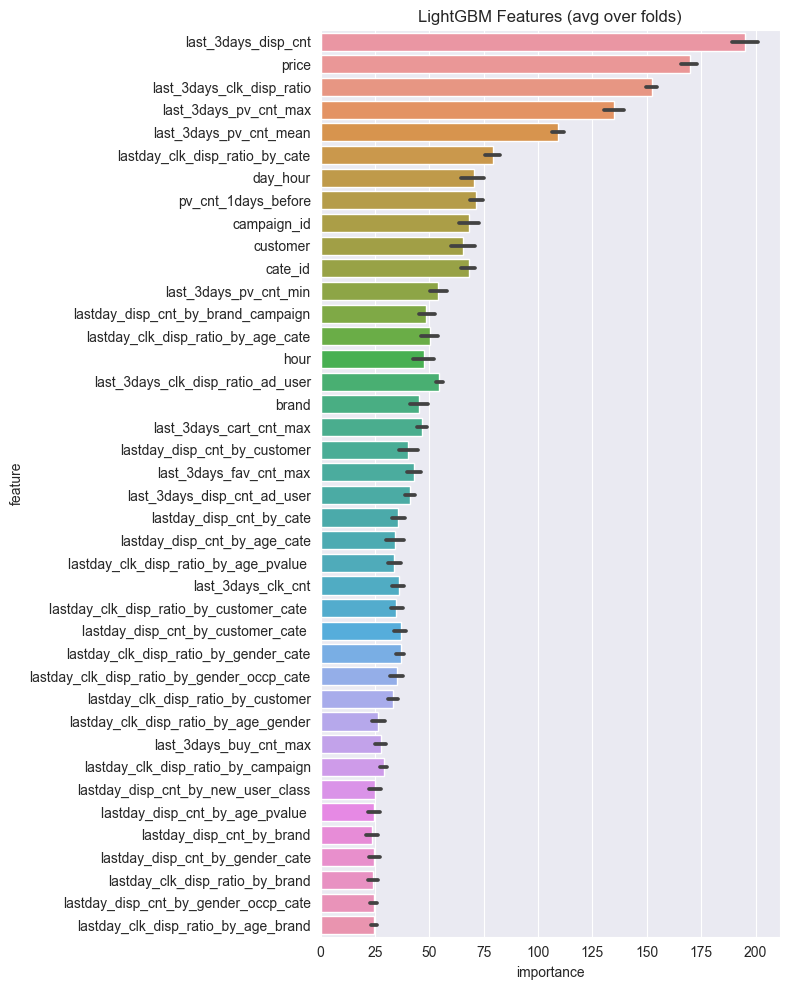

In [27]:
kfold_lightgbm_model(X_train, X_test, y_train, y_test, 10, None, stratified = True)

### MLP-baseline

In [28]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import StringLookup

#### tensor基础数据建设

In [29]:
train_data = X_train.copy()
test_data = X_test.copy()
train_data['clk'] = y_train
test_data['clk'] = y_test

In [30]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [31]:
train_data = reduce_mem_usage(train_data)
test_data = reduce_mem_usage(test_data)

Memory usage of dataframe is 1365.93 MB
Memory usage after optimization is: 339.90 MB
Decreased by 75.1%
Memory usage of dataframe is 672.77 MB
Memory usage after optimization is: 167.41 MB
Decreased by 75.1%


In [32]:
for col in sparse_feas:
    train_data[col] = train_data[col].apply(lambda x: 'f_'+str(x))
    test_data[col] = test_data[col].apply(lambda x: 'f_'+str(x))


In [35]:
train_data_file = r"E:\编程参考书\机器学习\机器学习高级实践：计算广告、供需预测、智能营销、动态定价\testaa_1\C6\data\final_data\deep_data\train_data.csv"
test_data_file = r"E:\编程参考书\机器学习\机器学习高级实践：计算广告、供需预测、智能营销、动态定价\testaa_1\C6\data\final_data\deep_data\test_data.csv"

In [36]:
train_data.to_csv(train_data_file, index=False)

In [37]:
test_data.to_csv(test_data_file, index=False)

In [38]:
CATEGORICAL_FEATURES_WITH_VOCABULARY = dict()

data_ = pd.concat([train_data, test_data]).reset_index(drop=True)
for fea in sparse_feas:
    CATEGORICAL_FEATURES_WITH_VOCABULARY[fea] = list(data_[fea].unique())
    
TARGET_FEATURE_NAME = 'clk'

CSV_HEADER = list(train_data.columns)

NUMERIC_FEATURE_NAMES = dense_feas + other_feas 

CATEGORICAL_FEATURE_NAMES = sparse_feas

FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES

NUM_CLASSES = 2

# 模型参数
learning_rate = 0.1
dropout_rate = 0.5
batch_size = 4096
num_epochs = 1

hidden_units = [200, 80]

neg = train_data.clk.value_counts()[0]
pos = train_data.clk.value_counts()[1]
total = train_data.shape[0]

# 样本不均衡处理
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

# tensor转换
def get_dataset_from_csv(csv_file_path, batch_size, shuffle=False):

    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=True,
        shuffle=shuffle,
    )
    return dataset.cache()

# 输入输出处理
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float32
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs
    
# 进行Embedding处理
def encode_inputs(inputs, use_embedding=False):
    encoded_features = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            lookup = StringLookup(
                vocabulary=vocabulary,
                mask_token=None,
                num_oov_indices=0,
                output_mode="int" if use_embedding else "binary",
            )
            if use_embedding:
                encoded_feature = lookup(inputs[feature_name])
                embedding_dims = int(math.sqrt(len(vocabulary)))
                embedding = layers.Embedding(
                    input_dim=len(vocabulary), output_dim=embedding_dims
                )
                encoded_feature = embedding(encoded_feature)
            else:
                encoded_feature = lookup(tf.expand_dims(inputs[feature_name], -1))
        else:
            encoded_feature = tf.expand_dims(inputs[feature_name], -1)
        encoded_features.append(encoded_feature)
    all_features = layers.concatenate(encoded_features)
    return all_features

# 实验运行
def run_experiment(model):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=['binary_crossentropy'],
    )

    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)

    test_dataset = get_dataset_from_csv(test_data_file, batch_size)

    print("Start training the model...")
    history = model.fit(train_dataset, epochs=num_epochs, class_weight=class_weights)
    print("Model training finished")

    _, accuracy = model.evaluate(test_dataset, verbose=0)

    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

# 模型构建
def mlp_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)

    for units in hidden_units:
        features = layers.Dense(units)(features)
        features = layers.BatchNormalization()(features)
        features = layers.ReLU()(features)
        features = layers.Dropout(dropout_rate)(features)

    outputs = layers.Dense(units=1, activation="softmax")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model



Weight for class 0: 0.53
Weight for class 1: 9.69


In [39]:
mlp_model = mlp_model()

In [40]:
run_experiment(mlp_model)

Start training the model...


ResourceExhaustedError: Graph execution error:

Detected at node model/concatenate/concat defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "D:\python\Lib\asyncio\base_events.py", line 607, in run_forever

  File "D:\python\Lib\asyncio\base_events.py", line 1919, in _run_once

  File "D:\python\Lib\asyncio\events.py", line 80, in _run

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18508\1032818655.py", line 1, in <module>

  File "C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18508\964464423.py", line 109, in run_experiment

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\layers\merging\base_merge.py", line 196, in call

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\layers\merging\concatenate.py", line 134, in _merge_function

  File "E:\Py-Project\DataScience\venv\Lib\site-packages\keras\src\backend.py", line 3582, in concatenate

OOM when allocating tensor with shape[4096,463268] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model/concatenate/concat}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_5622]

### DeepCrossing

In [ ]:
# 残差网络
residual_block_nums = 2

class ResidualBlock(layers.Layer):

    def __init__(self, units): # units表示的是DNN隐藏层神经元数量
        super(ResidualBlock, self).__init__()
        self.units = units

    def build(self, input_shape):
        out_dim = input_shape[-1]
        self.dnn1 = layers.Dense(self.units, activation='relu')
        self.dnn2 = layers.Dense(out_dim, activation='relu') # 保证输入的维度和输出的维度一致才能进行残差连接
    def call(self, inputs):
        x = inputs
        x = self.dnn1(x)
        x = self.dnn2(x)
        x = layers.Activation('relu')(x + inputs) # 残差操作
        return x

def deepCrossing_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)
    residual_inputs = features
    
    for i in range(residual_block_nums):
        residual_inputs = ResidualBlock(64)(residual_inputs)
    
    # scoring Layer
    score_layer = layers.Dense(units=1, activation='softmax')(residual_inputs)
    model = keras.Model(inputs=inputs, outputs=score_layer)
    return model
    

In [ ]:
deepCrossing_model = deepCrossing_model()
run_experiment(deepCrossing_model)

### Wide&Deep

In [ ]:
# Wide&Deep模型
def wide_and_deep_model():

    inputs = create_model_inputs()
    wide = encode_inputs(inputs)
    wide = layers.BatchNormalization()(wide)

    deep = encode_inputs(inputs, use_embedding=True)
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([wide, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# 模型训练
wide_and_deep_model = wide_and_deep_model()
run_experiment(wide_and_deep_model)
wide_and_deep_model.summary()

### DCN

In [ ]:
def dcn_model():

    inputs = create_model_inputs()
    x0 = encode_inputs(inputs, use_embedding=True)

    cross = x0
    for _ in hidden_units:
        units = cross.shape[-1]
        x = layers.Dense(units)(cross)
        cross = x0 * x + cross
    cross = layers.BatchNormalization()(cross)

    deep = x0
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([cross, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
dcn_model = dcn_model()
run_experiment(dcn_model)

In [ ]:
dcn_model.summary()

### DeepFM

In [ ]:
### DeepFM
class FM_Layer(layers.Layer):
    def __init__(self):
        super(FM_Layer, self).__init__()

    def call(self, inputs):
        # 优化后的公式为： 0.5 * 求和（和的平方-平方的和）  =>> B x 1
        concated_embeds_value = inputs # B x n x k
        square_of_sum = tf.square(tf.reduce_sum(concated_embeds_value, axis=1, keepdims=True)) # B x 1 x k
        sum_of_square = tf.reduce_sum(concated_embeds_value * concated_embeds_value, axis=1, keepdims=True) # B x1 xk
        cross_term = square_of_sum - sum_of_square # B x 1 x k
        cross_term = 0.5 * tf.reduce_sum(cross_term, axis=2, keepdims=False) # B x 1

        return cross_term

    def compute_output_shape(self, input_shape):
        return (None, 1)
    
def deepFM_model():
    inputs = create_model_inputs()
    x0 = encode_inputs(inputs)
    # fm部分
    x0_ = tf.expand_dims(x0, 1)
    fm = FM_Layer()(x0_)
    # deep部分
    deep = x0
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    merged = layers.concatenate([fm, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

deepfm_model = deepFM_model()
run_experiment(deepfm_model)

### AFM

In [ ]:
class AFMLayer(layers.Layer):  
    def __init__(self, attention_factor=4, l2_reg_w=0, dropout_rate=0, seed=1024, **kwargs):  
        self.attention_factor = attention_factor  
        self.l2_reg_w = l2_reg_w  
        self.dropout_rate = dropout_rate  
        self.seed = seed  
        super(AFMLayer, self).__init__(**kwargs)    
    def build(self, input_shape):  
        if not isinstance(input_shape, list) or len(input_shape) < 2:  
            raise ValueError('A `AttentionalFM` layer should be called '  
                     'on a list of at least 2 inputs')  
  
        shape_set = set()  
        reduced_input_shape = [shape.as_list() for shape in input_shape]          
        for i in range(len(input_shape)):  
            shape_set.add(tuple(reduced_input_shape[i]))    
        if len(shape_set) > 1:  
            raise ValueError('A `AttentionalFM` layer requires '  
                     'inputs with same shapes '  
                     'Got different shapes: %s' % (shape_set))  
        if len(input_shape[0]) != 3 or input_shape[0][1] != 1:  
            raise ValueError('A `AttentionalFM` layer requires')    
        embedding_size = int(input_shape[0][-1])    
        self.attention_W = self.add_weight(shape=(embedding_size,  
                 self.attention_factor), initializer=glorot_normal(seed=self.seed),  
                                           regularizer=l2(self.l2_reg_w), name="attention_W")  
        self.attention_b = self.add_weight(  
            shape=(self.attention_factor,), initializer=Zeros(), name="attention_b")  
        self.projection_h = self.add_weight(shape=(self.attention_factor, 1),  
                                            initializer=glorot_normal(seed=self.seed), name="projection_h")  
        self.projection_p = self.add_weight(shape=(  
            embedding_size, 1), initializer=glorot_normal(seed=self.seed), name="projection_p")  
        self.dropout = tf.keras.layers.Dropout(  
            self.dropout_rate, seed=self.seed)  
        self.tensordot = tf.keras.layers.Lambda(  
           lambda x: tf.tensordot(x[0], x[1], axes=(-1, 0)))  
  
        # Be sure to call this somewhere!  
        super(AFMLayer, self).build(input_shape)  
  
    def call(self, inputs, training=None, **kwargs):  
  
        if K.ndim(inputs[0]) != 3:  
           raise ValueError(  
            "Unexpected inputs dimensions %d, expect to be 3 dimensions" % (K.ndim(inputs)))  
 
        embeds_vec_list = inputs  
        row = []  
        col = []  
        for r, c in itertools.combinations(embeds_vec_list, 2):  
            row.append(r)  
            col.append(c)  
        p = tf.concat(row, axis=1)  
        q = tf.concat(col, axis=1)  
        inner_product = p * q   
        bi_interaction = inner_product  
        attention_temp = tf.nn.relu(tf.nn.bias_add(tf.tensordot(  
            bi_interaction, self.attention_W, axes=(-1, 0)), self.attention_b))  
          
        self.normalized_att_score = tf.nn.softmax(tf.tensordot(  
            attention_temp, self.projection_h, axes=(-1, 0)))  
        attention_output = tf.reduce_sum(  
            self.normalized_att_score * bi_interaction, axis=1)  
  
        attention_output = self.dropout(attention_output) # training  
        afm_out = self.tensordot([attention_output, self.projection_p])  
        return afm_out    
    def compute_output_shape(self, input_shape):  
        if not isinstance(input_shape, list):  
            raise ValueError('A `AFMLayer` layer should be called '  
                    'on a list of inputs.')  
        return (None, 1)  
  
    def get_config(self, ):  
        config = {'attention_factor': self.attention_factor,  
             'l2_reg_w': self.l2_reg_w, 'dropout_rate': self.dropout_rate, 'seed': self.seed}  
        base_config = super(AFMLayer, self).get_config()  
        return dict(list(base_config.items()) + list(config.items())) 

